In [1]:
import pandas as pd 
import numpy as np 
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [2]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [3]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [4]:
df.fillna(0, inplace = True)
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [5]:
X= df.drop('fuel_efficiency_mpg', axis=1)
y= df.fuel_efficiency_mpg

In [6]:
from sklearn.model_selection import train_test_split

X_full_train ,X_test , y_full_train , y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train ,X_val , y_train , y_val = train_test_split(X_full_train,y_full_train,test_size=0.25,random_state=1)
len(X_full_train),len(X_train), len(X_val), len(X_test)

(7763, 5822, 1941, 1941)

In [7]:
X_train=X_train.reset_index(drop=True)
X_val=X_val.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
X_full_train=X_full_train.reset_index(drop=True)
X_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,120,5.0,169.0,2966.679505,13.9,2005,USA,Gasoline,Front-wheel drive,-1.0
1,200,3.0,143.0,2950.822121,17.1,2013,Asia,Diesel,Front-wheel drive,-1.0
2,180,6.0,180.0,3078.221669,17.4,2007,USA,Gasoline,All-wheel drive,0.0
3,280,5.0,174.0,2797.991793,0.0,2016,USA,Diesel,All-wheel drive,0.0
4,250,4.0,133.0,2362.426930,16.3,2010,USA,Diesel,Front-wheel drive,-1.0
...,...,...,...,...,...,...,...,...,...,...
5817,230,3.0,176.0,3430.993044,17.9,2022,Europe,Diesel,All-wheel drive,0.0
5818,250,4.0,180.0,3067.664350,15.7,2010,Asia,Diesel,All-wheel drive,-1.0
5819,230,2.0,182.0,3041.964593,16.7,2010,Europe,Diesel,All-wheel drive,0.0
5820,180,7.0,147.0,2453.341430,15.2,2015,Europe,Gasoline,All-wheel drive,0.0


In [8]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [9]:
categorical = ['origin','fuel_type','drivetrain']
numerical = ['engine_displacement','num_cylinders','horsepower','vehicle_weight', 'acceleration', 'model_year', 'num_doors']

In [10]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = X_train.to_dict(orient="records")
X_train_encoded = dv.fit_transform(train_dict)

val_dict = X_val.to_dict(orient="records")
X_val_encoded = dv.transform(val_dict)

test_dict = X_test.to_dict(orient="records")
X_test_encoded = dv.transform(test_dict)

full_train_dict = X_full_train.to_dict(orient="records")
X_full_trian_encoded = dv.fit_transform(full_train_dict)

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train_encoded,y_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [12]:
feature_names = dv.get_feature_names_out()
feature_names

array(['acceleration', 'drivetrain=All-wheel drive',
       'drivetrain=Front-wheel drive', 'engine_displacement',
       'fuel_type=Diesel', 'fuel_type=Gasoline', 'horsepower',
       'model_year', 'num_cylinders', 'num_doors', 'origin=Asia',
       'origin=Europe', 'origin=USA', 'vehicle_weight'], dtype=object)

[Text(0.5, 0.75, 'vehicle_weight <= 3022.107\nsquared_error = 6.398\nsamples = 5822\nvalue = 14.994'),
 Text(0.25, 0.25, 'squared_error = 2.575\nsamples = 3034\nvalue = 16.882'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 2.453\nsamples = 2788\nvalue = 12.938'),
 Text(0.625, 0.5, '  False')]

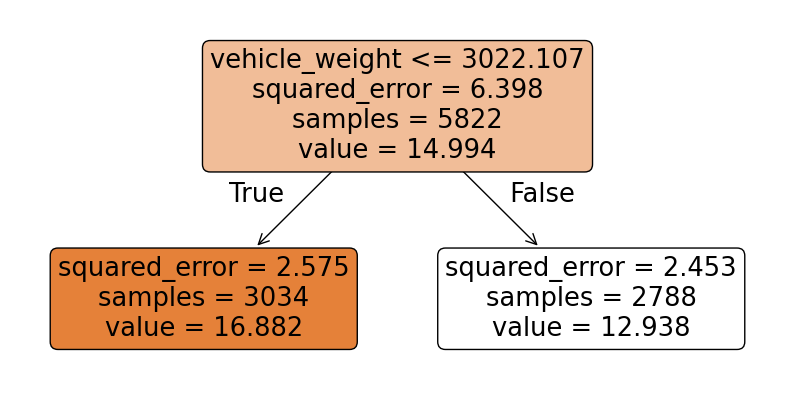

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plot_tree(dt, 
          feature_names=feature_names,
          filled=True,
          rounded=True)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
forest = RandomForestRegressor(n_estimators=10,random_state=1,n_jobs=-1)
forest.fit(X_train_encoded,y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
y_pred = forest.predict(X_val_encoded)
RMSE = root_mean_squared_error(y_val,y_pred)
RMSE

0.4599777557336148

In [16]:
n_estimators_values = np.arange(10,210,10)
RMSE_values= []
for n in n_estimators_values:
    forest = RandomForestRegressor(n_estimators=n,random_state=1,n_jobs=-1)
    forest.fit(X_train_encoded,y_train)
    y_pred = forest.predict(X_val_encoded)
    RMSE = root_mean_squared_error(y_val,y_pred)
    print(f"n_estimators: {n}   RMSE: {round(RMSE,3)}")

n_estimators: 10   RMSE: 0.46
n_estimators: 20   RMSE: 0.454
n_estimators: 30   RMSE: 0.451
n_estimators: 40   RMSE: 0.448
n_estimators: 50   RMSE: 0.446
n_estimators: 60   RMSE: 0.445
n_estimators: 70   RMSE: 0.445
n_estimators: 80   RMSE: 0.445
n_estimators: 90   RMSE: 0.445
n_estimators: 100   RMSE: 0.444
n_estimators: 110   RMSE: 0.443
n_estimators: 120   RMSE: 0.444
n_estimators: 130   RMSE: 0.443
n_estimators: 140   RMSE: 0.443
n_estimators: 150   RMSE: 0.443
n_estimators: 160   RMSE: 0.443
n_estimators: 170   RMSE: 0.443
n_estimators: 180   RMSE: 0.442
n_estimators: 190   RMSE: 0.443
n_estimators: 200   RMSE: 0.443


In [17]:
n_estimators_values = np.arange(10,201,10)
for m_depth in [10, 15, 20, 25]:
    
    RMSE_values= []
    for n in n_estimators_values:
         forest = RandomForestRegressor(max_depth=m_depth,n_estimators=n,random_state=1,n_jobs=-1)
         forest.fit(X_train_encoded,y_train)
         y_pred = forest.predict(X_val_encoded)
         RMSE = root_mean_squared_error(y_val,y_pred)
         RMSE_values.append(RMSE)
    print(f"max depth: {m_depth}   RMSE: {np.mean(RMSE_values)}")
   
    

max depth: 10   RMSE: 0.44232130237115186
max depth: 15   RMSE: 0.44505999920137435
max depth: 20   RMSE: 0.4456441321803526
max depth: 25   RMSE: 0.44566060000292457


In [18]:
forest = RandomForestRegressor(max_depth=20 ,n_estimators=10 ,random_state=1,n_jobs=-1)
forest.fit(X_train_encoded,y_train)
feature_importance = forest.feature_importances_
#Combine names and importances for a clear view
importance_df = pd.Series(feature_importance, index=feature_names)
print("Feature Importances:")
print(importance_df.sort_values(ascending=False))

Feature Importances:
vehicle_weight                  0.959162
horsepower                      0.016040
acceleration                    0.011471
engine_displacement             0.003269
model_year                      0.003182
num_cylinders                   0.002359
num_doors                       0.001591
origin=USA                      0.000555
origin=Europe                   0.000520
origin=Asia                     0.000476
drivetrain=All-wheel drive      0.000382
fuel_type=Diesel                0.000344
fuel_type=Gasoline              0.000337
drivetrain=Front-wheel drive    0.000312
dtype: float64


In [19]:
from sklearn.inspection import permutation_importance


# 1. Calculate permutation importance
# (Using the validation set is crucial!)
result = permutation_importance(
    forest, 
    X_val_encoded,          
    y_val,          
    n_repeats=10,  
    random_state=42
)

# 2. Get the importances
importances = result.importances_mean

# 3. Combine names and importances
importance_df = pd.Series(importances, index=feature_names)

# 4. Sort and print
print("Permutation Importances:")
print(importance_df.sort_values(ascending=False))

Permutation Importances:
vehicle_weight                  1.911499
horsepower                      0.020558
acceleration                    0.012548
engine_displacement             0.000135
origin=Europe                   0.000134
num_cylinders                   0.000108
fuel_type=Diesel                0.000084
origin=USA                      0.000028
drivetrain=All-wheel drive     -0.000029
num_doors                      -0.000077
drivetrain=Front-wheel drive   -0.000080
origin=Asia                    -0.000121
fuel_type=Gasoline             -0.000128
model_year                     -0.000393
dtype: float64


In [27]:
import xgboost as xg  

In [30]:
dtrain = xg.DMatrix(X_train_encoded, label=y_train)
dval = xg.DMatrix(X_val_encoded, label=y_val)

watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

eval_results_1 = {}
model = xg.train(
    xgb_params,
    dtrain,
    num_boost_round=100,
    evals=watchlist,
    evals_result=eval_results_1, 
    verbose_eval=False 
)

rmse_1 = eval_results_1['val']['rmse'][-1]
print(f"Final RMSE with eta=0.3: {rmse_1}")

Final RMSE with eta=0.3: 0.45017754981610764


In [32]:

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

eval_results_1 = {}
model = xg.train(
    xgb_params,
    dtrain,
    num_boost_round=100,
    evals=watchlist,
    evals_result=eval_results_1, 
    verbose_eval=False 
)

rmse_1 = eval_results_1['val']['rmse'][-1]
print(f"Final RMSE with eta=0.1: {rmse_1}")

Final RMSE with eta=0.1: 0.4262280017058715
